In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
x= torch.tensor([2,3]).float()
x.requires_grad = True

In [3]:
x

tensor([2., 3.], requires_grad=True)

In [4]:
y = x**2

In [5]:
y

tensor([4., 9.], grad_fn=<PowBackward0>)

In [6]:
torch.autograd.grad(y.sum(), x)

(tensor([4., 6.]),)

In [7]:
class neural_net(nn.Module):
    def __init__(self):
        super(neural_net, self).__init__()

        self.fc_1 = nn.Linear(1, 256)
        self.fc_2 = nn.Linear(256, 256)
        self.fc_3 = nn.Linear(256, 256)
        self.fc_4 = nn.Linear(256, 256)
        self.out = nn.Linear(256,1)
        self.relu = nn.ReLU()
        self.prelu = nn.PReLU()
        self.tanh = nn.Tanh()

        with torch.no_grad():
            torch.nn.init.xavier_uniform(self.fc_1.weight)
            torch.nn.init.xavier_uniform(self.fc_2.weight)
            torch.nn.init.xavier_uniform(self.fc_3.weight)
            torch.nn.init.xavier_uniform(self.fc_4.weight)

    def forward(self, state, train=False):
        state = torch.sin(self.fc_1(state))
        state = torch.sin(self.fc_2(state))
        # state = torch.sin(self.fc_3(state))
        # state = torch.sin(self.fc_4(state))
        fn_u = self.out(state)
        return fn_u

In [8]:
import matplotlib.pyplot as plt

In [9]:
example_nn = neural_net()
optimizer = optim.Adam(example_nn.parameters(), lr=0.001)
x = torch.linspace(0, 10, 100)


C:\Users\haoyang\AppData\Local\Temp\ipykernel_21856\751256153.py:15: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc_1.weight)
C:\Users\haoyang\AppData\Local\Temp\ipykernel_21856\751256153.py:16: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc_2.weight)
C:\Users\haoyang\AppData\Local\Temp\ipykernel_21856\751256153.py:17: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc_3.weight)
C:\Users\haoyang\AppData\Local\Temp\ipykernel_21856\751256153.py:18: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc_4.weight)


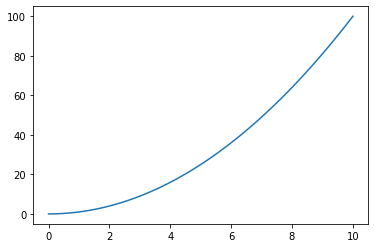

In [10]:

y_pred = []
for x_ in x:
    y_pred.append(example_nn.forward(torch.tensor([x_]).float()).detach().numpy()[0])
y_target = x**2
plt.plot(x,y_target)


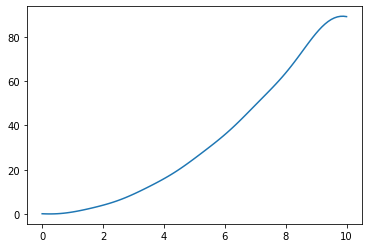

In [11]:
epochs = 1000
from IPython.display import display, clear_output
loss_list = []
for i in range(epochs):
    y_pred = example_nn.forward(torch.tensor(x).float().unsqueeze(-1))
    y_pred = y_pred.squeeze(1)


    y_target = torch.tensor(y_target, requires_grad=True).float()
    # print(y_target)
    optimizer.zero_grad()
    loss = torch.mean((y_target - y_pred)**2)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.detach().numpy())

    clear_output(wait=True)
    plt.plot(x, y_pred.detach().numpy(), label='pred')
    plt.show()

    # plt.plot(loss_list)
    # plt.show()


In [12]:
y_target

tensor([0.0000e+00, 1.0203e-02, 4.0812e-02, 9.1827e-02, 1.6325e-01, 2.5508e-01,
        3.6731e-01, 4.9995e-01, 6.5299e-01, 8.2645e-01, 1.0203e+00, 1.2346e+00,
        1.4692e+00, 1.7243e+00, 1.9998e+00, 2.2957e+00, 2.6120e+00, 2.9487e+00,
        3.3058e+00, 3.6833e+00, 4.0812e+00, 4.4995e+00, 4.9383e+00, 5.3974e+00,
        5.8770e+00, 6.3769e+00, 6.8973e+00, 7.4380e+00, 7.9992e+00, 8.5808e+00,
        9.1827e+00, 9.8051e+00, 1.0448e+01, 1.1111e+01, 1.1795e+01, 1.2499e+01,
        1.3223e+01, 1.3968e+01, 1.4733e+01, 1.5519e+01, 1.6325e+01, 1.7151e+01,
        1.7998e+01, 1.8865e+01, 1.9753e+01, 2.0661e+01, 2.1590e+01, 2.2539e+01,
        2.3508e+01, 2.4498e+01, 2.5508e+01, 2.6538e+01, 2.7589e+01, 2.8660e+01,
        2.9752e+01, 3.0864e+01, 3.1997e+01, 3.3150e+01, 3.4323e+01, 3.5517e+01,
        3.6731e+01, 3.7966e+01, 3.9220e+01, 4.0496e+01, 4.1792e+01, 4.3108e+01,
        4.4444e+01, 4.5801e+01, 4.7179e+01, 4.8577e+01, 4.9995e+01, 5.1434e+01,
        5.2893e+01, 5.4372e+01, 5.5872e+

In [13]:
y_pred = y_pred.squeeze(1)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [ ]:
y_pred